# Enron EDA
### By Luiz Schiller

In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_columns', None)

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

In [24]:
df = pd.DataFrame.from_dict(data_dict, orient='index')

In [26]:
df.replace('NaN', np.nan, inplace = True)
email_features = ['email_address', 'to_messages', 'from_messages', 'from_this_person_to_poi', 
                  'from_poi_to_this_person', 'shared_receipt_with_poi']
financial_features = ['salary', 'bonus', 'long_term_incentive', 'deferred_income', 'deferral_payments', 
                      'loan_advances', 'other', 'expenses', 'director_fees', 'total_payments', 
                      'exercised_stock_options', 'restricted_stock', 'restricted_stock_deferred', 'total_stock_value']
labels = ['poi']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 21 columns):
salary                       95 non-null float64
to_messages                  86 non-null float64
deferral_payments            39 non-null float64
total_payments               125 non-null float64
exercised_stock_options      102 non-null float64
bonus                        82 non-null float64
restricted_stock             110 non-null float64
shared_receipt_with_poi      86 non-null float64
restricted_stock_deferred    18 non-null float64
total_stock_value            126 non-null float64
expenses                     95 non-null float64
loan_advances                4 non-null float64
from_messages                86 non-null float64
other                        93 non-null float64
from_this_person_to_poi      86 non-null float64
poi                          146 non-null bool
director_fees                17 non-null float64
deferred_income              49 non-null float

In [5]:
df[labels].info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 1 columns):
poi    146 non-null bool
dtypes: bool(1)
memory usage: 730.0+ bytes


In [6]:
len(df[df['poi']])

18

There are 146 entries and 21 variables - 6 email features, 14 financial features and 1 poi label. A lot of missing values.
18 POI's and 128 non-POI's.

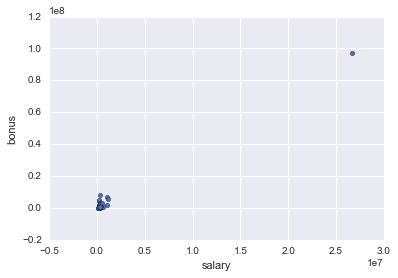

In [7]:
df.plot.scatter(x = 'salary', y = 'bonus')

There is a salary bigger than 2.5 *10^7 🤔. It seems too much even for Enron. Let's investigate it a little further.

In [8]:
df[df['salary'] > 2.5 * 10**7]

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,expenses,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
TOTAL,26704229.0,NaN,32083396.0,309886585.0,311764000.0,97343619.0,130322299.0,NaN,-7576788.0,434509511.0,5235198.0,83925000.0,NaN,42667589.0,NaN,False,1398517.0,-27992891.0,48521928.0,NaN,NaN


This huge salary is the TOTAL of the salaries of the listed employees, so I'm going to remove it.

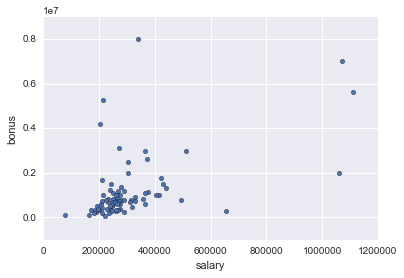

In [9]:
df.drop('TOTAL', inplace = True)
df.plot.scatter(x = 'salary', y = 'bonus')

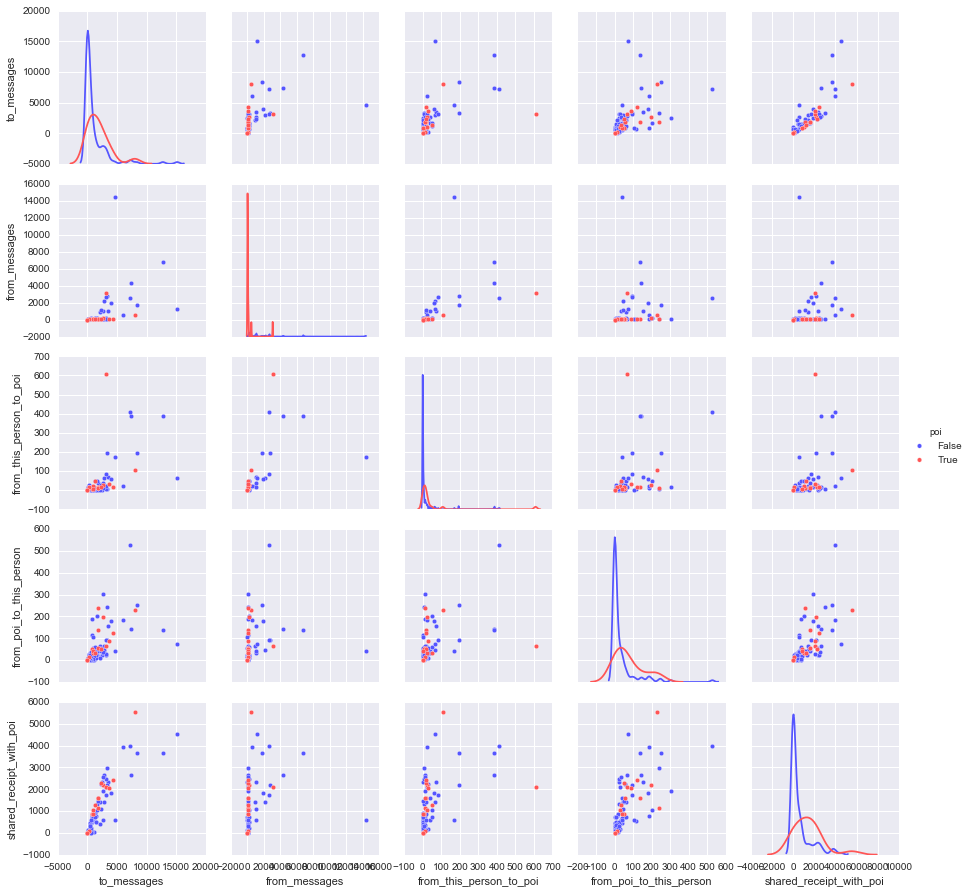

In [19]:
g = sns.pairplot(
    df.fillna(0), 
    vars=['to_messages', 'from_messages', 'from_this_person_to_poi', 
          'from_poi_to_this_person', 'shared_receipt_with_poi'], 
    hue='poi',
    diag_kind="kde",
    palette='seismic')

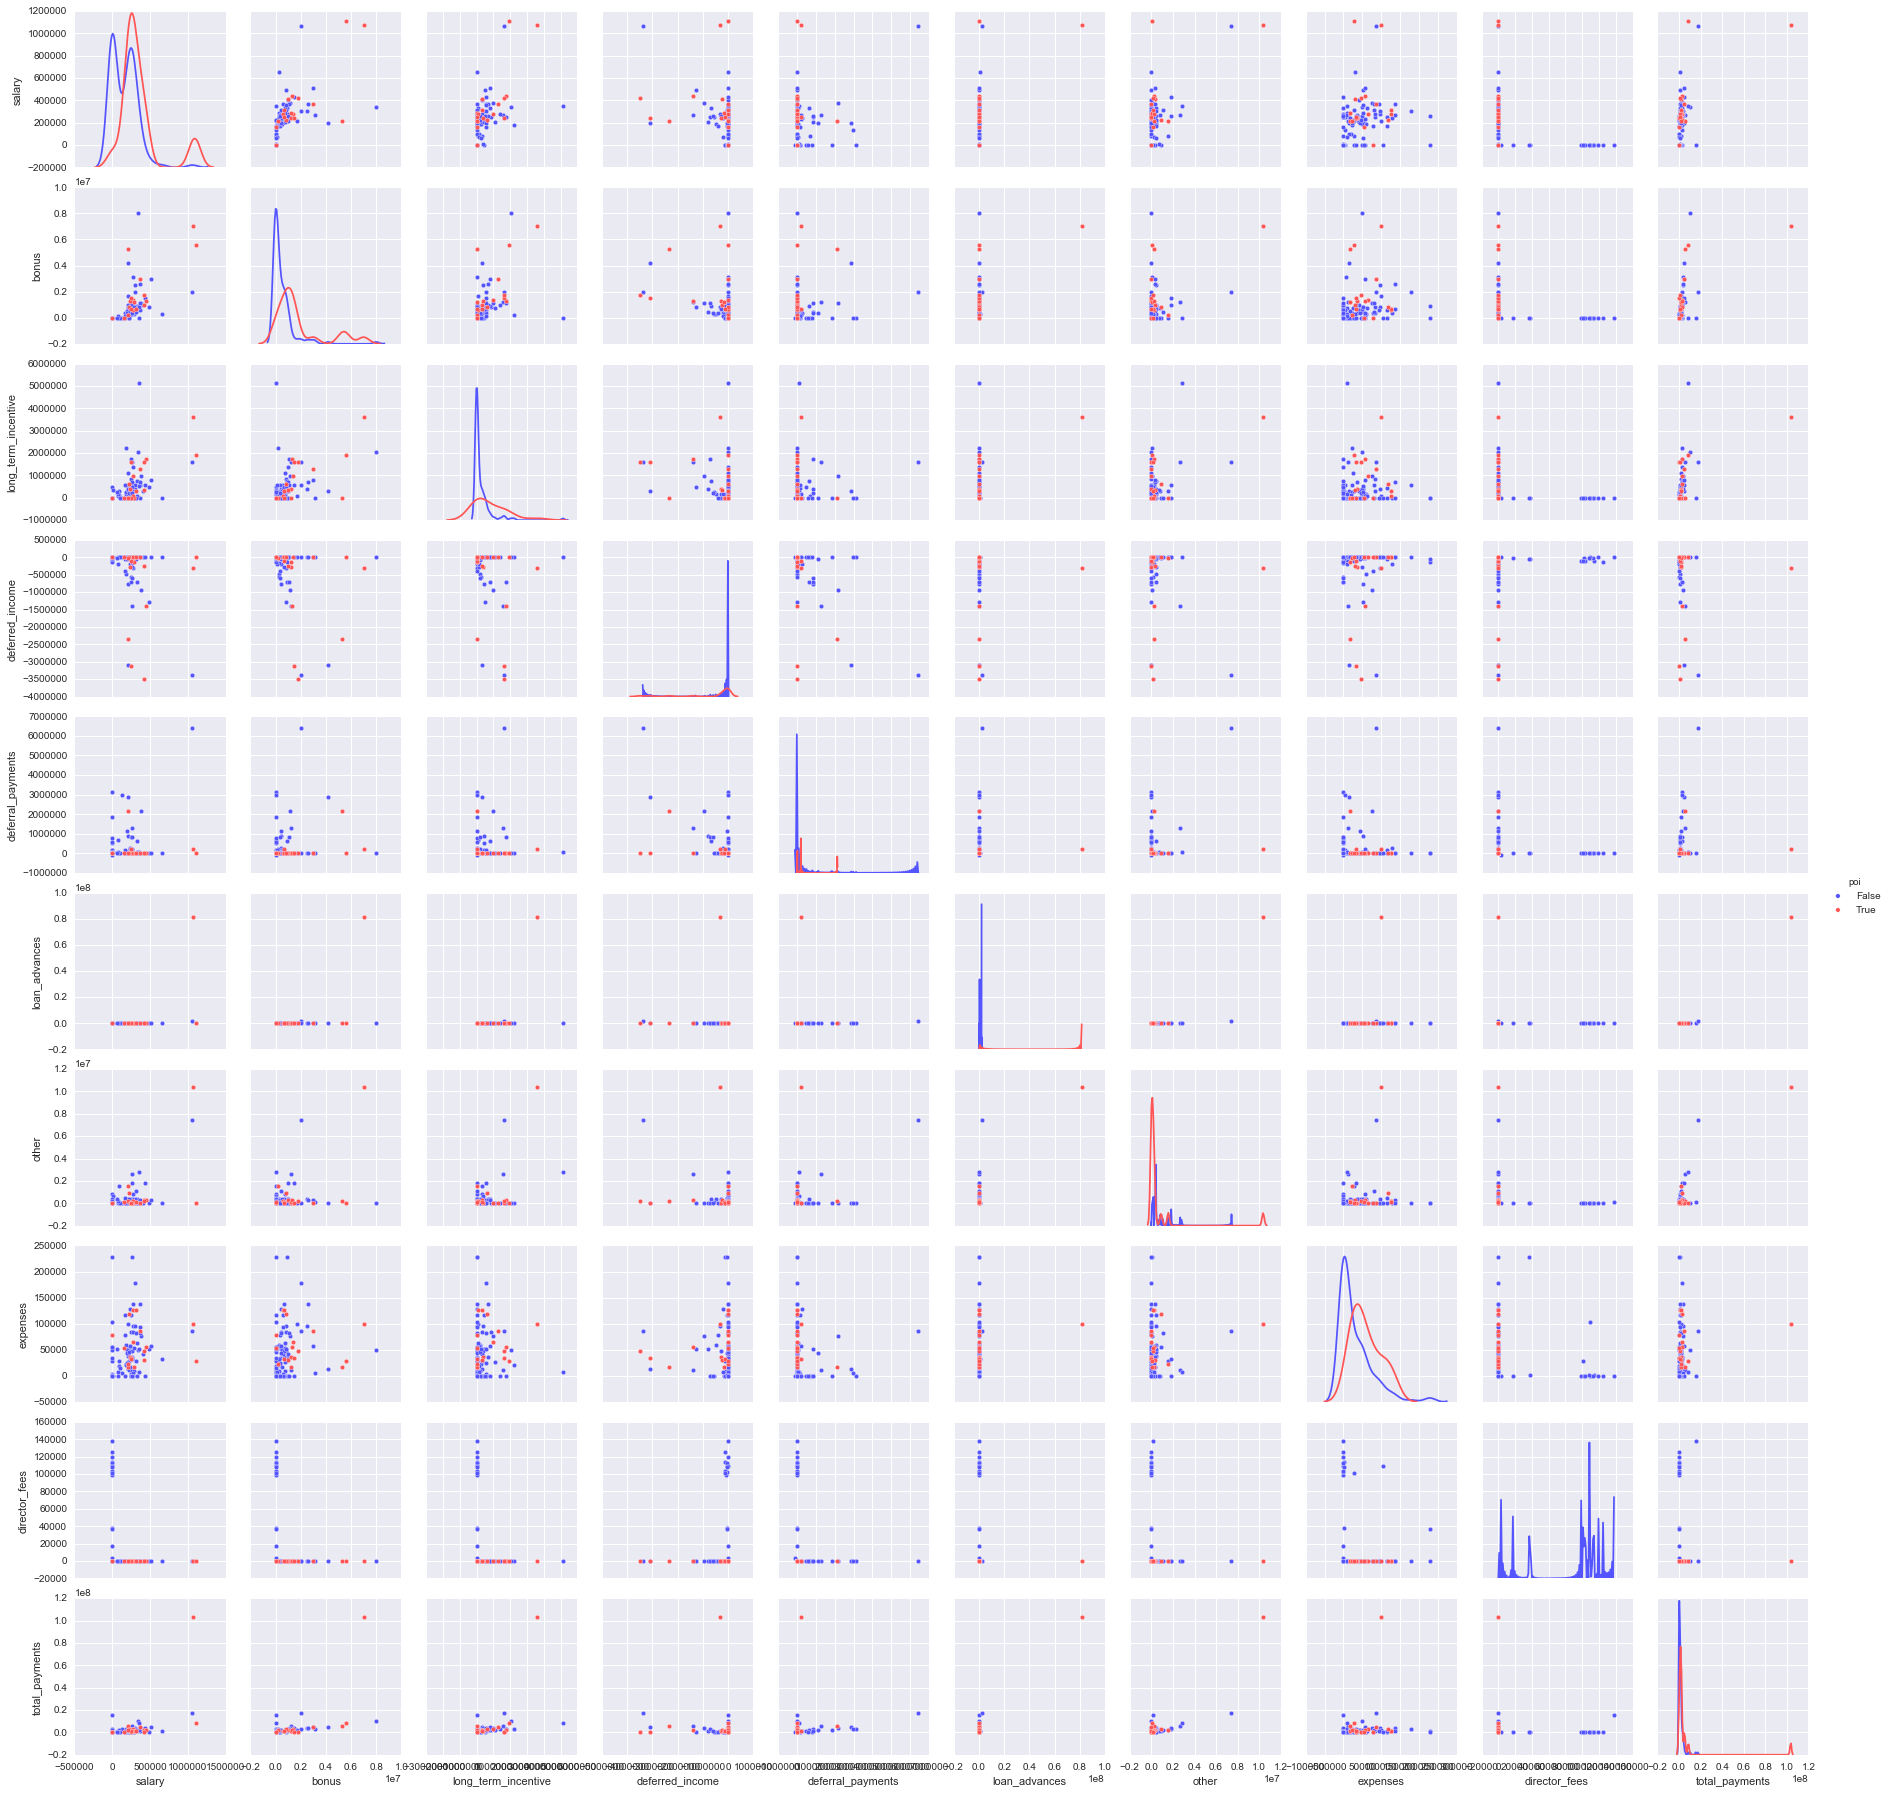

In [21]:
g = sns.pairplot(
    df.fillna(0), 
    vars=['salary', 'bonus', 'long_term_incentive', 'deferred_income', 'deferral_payments', 
          'loan_advances', 'other', 'expenses', 'director_fees', 'total_payments'], 
    hue='poi',
    diag_kind="kde",
    palette='seismic')

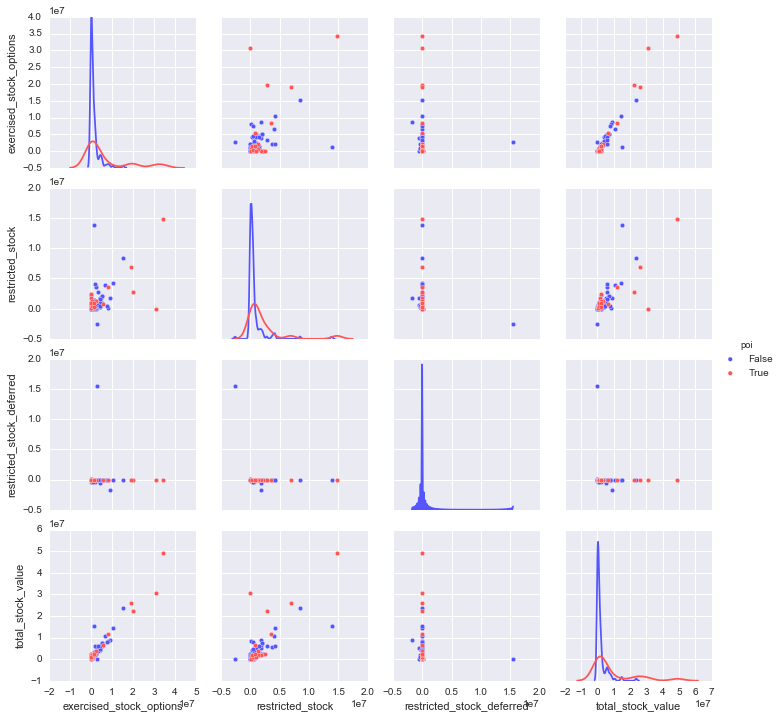

In [20]:
g = sns.pairplot(
    df.fillna(0),
    vars=['exercised_stock_options', 'restricted_stock', 'restricted_stock_deferred', 'total_stock_value'],
    hue='poi',
    diag_kind="kde",
    palette='seismic')

In [23]:
df[df['loan_advances']]

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,expenses,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
LAY KENNETH L,1072321.0,4273.0,202911.0,103559793.0,34348384.0,7000000.0,14761694.0,2411.0,NaN,49110078.0,99832.0,81525000.0,36.0,10359729.0,16.0,True,NaN,-300000.0,3600000.0,kenneth.lay@enron.com,123.0
